Natalia Organek - lab 3

In [2]:
import os
import re
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

# Task 1
Make sure the texts in the corpus does not contain HTML code.

In [3]:
directory = '../lab1/ustawy'
filenames = os.listdir(directory)

To remove HTML code, I remove any text in <  > as it is an HTML tag. I also make text lowercase as case sensitiveness will not be needed in any task but lowercase can help. 


In [125]:
corpus = {}
html_regex = r'<[\s\S]*?>'


for filename in filenames:
    with open(os.path.join(directory, filename)) as f:
        bill = f.read()
        bill = bill.lower()
        bill = re.sub(html_regex, '', bill)
        bill = bill.replace('\xad', '')
        
        corpus[filename] = bill

# Task 2
Use SpaCy tokenizer API to tokenize the text from the cleaned law corpus.

In [126]:
#!pip3 install -U spacy
#!python3 -m spacy download pl_core_news_sm

In [127]:
import spacy

In [128]:
polish_spacy = spacy.load('pl_core_news_sm')
tokenizer = polish_spacy.tokenizer

In [129]:
tokens = tokenizer('Wypróbuję tokenizer. Wpiszę tu np. takie słowa - nie znam innych :\')')

In [130]:
[token.text for token in tokens]  # the way to make list of tokens out of doc

['Wypróbuję',
 'tokenizer',
 '.',
 'Wpiszę',
 'tu',
 'np',
 '.',
 'takie',
 'słowa',
 '-',
 'nie',
 'znam',
 'innych',
 ":')"]

In [131]:
corpus_tokenized = {}

for bill_id, bill in corpus.items():
    corpus_tokenized[bill_id] = [token.text for token in tokenizer(bill)]
    

In [132]:
corpus_tokenized[list(corpus_tokenized.keys())[0]]

['\n\n\n\n',
 'dz.u',
 '.',
 'z',
 '1998',
 'r',
 '.',
 'nr',
 '75',
 ',',
 'poz',
 '.',
 '486',
 '\n                                                                          \n                                                                          \n                                                                          \n                                     \n                                  ',
 'ustawa',
 '\n                           ',
 'z',
 'dnia',
 '7',
 'maja',
 '1998',
 'r',
 '.',
 '\n                                     \n        ',
 'o',
 'zmianie',
 'ustawy',
 'o',
 'zakładowym',
 'funduszu',
 'świadczeń',
 'socjalnych',
 '\n                                     \n                                  ',
 'art',
 '.',
 '1',
 '.',
 '\n',
 'w',
 'ustawie',
 'z',
 'dnia',
 '4',
 'marca',
 '1994',
 'r',
 '.',
 'o',
 'zakładowym',
 'funduszu',
 'świadczeń',
 '\n',
 'socjalnych',
 '(',
 'dz.u',
 '.',
 'z',
 '1996',
 'r',
 '.',
 'nr',
 '70',
 ',',
 'poz',
 '.',
 '335',
 ',',
 'nr

As we can see there are many tokens that should not be here, like numbers or many spaces with \n or interpunction. There is task 5 to clean it, but I'll do it right now because now there is in just one place.

In [133]:
letters_reg = r'\b[^\W\d\s_]+\b' # no no-word-characters, no digits and no spaces and _ - because it's delimiter in text
import regex

def token_valid(token):
    return len(token) > 1 and regex.match(letters_reg, token)

In [134]:
corpus_tokenized = {}

for bill_id, bill in corpus.items():
    tokens = [token.text for token in tokenizer(bill) if token_valid(token.text)]
    corpus_tokenized[bill_id] = tokens

In [135]:
corpus_tokenized[list(corpus_tokenized.keys())[0]]

['dz.u',
 'nr',
 'poz',
 'ustawa',
 'dnia',
 'maja',
 'zmianie',
 'ustawy',
 'zakładowym',
 'funduszu',
 'świadczeń',
 'socjalnych',
 'art',
 'ustawie',
 'dnia',
 'marca',
 'zakładowym',
 'funduszu',
 'świadczeń',
 'socjalnych',
 'dz.u',
 'nr',
 'poz',
 'nr',
 'poz',
 'nr',
 'poz',
 'nr',
 'poz',
 'nr',
 'poz',
 'nr',
 'poz',
 'wprowadza',
 'się',
 'następujące',
 'zmiany',
 'art',
 'ust',
 'po',
 'wyrazach',
 'minister',
 'spraw',
 'wewnętrznych',
 'dodaje',
 'się',
 'wyrazy',
 'administracji',
 'art',
 'ust',
 'otrzymuje',
 'brzmienie',
 'wysokość',
 'odpisu',
 'podstawowego',
 'może',
 'być',
 'zwiększona',
 'przeciętnego',
 'wynagrodzenia',
 'miesięcznego',
 'którym',
 'mowa',
 'ust',
 'na',
 'każdą',
 'zatrudnioną',
 'osobę',
 'stosunku',
 'do',
 'której',
 'orzeczono',
 'znaczny',
 'lub',
 'umiarkowany',
 'stopień',
 'niepełnosprawności',
 'art',
 'ust',
 'otrzymuje',
 'brzmienie',
 'zwiększenia',
 'których',
 'mowa',
 'ust',
 'pkt',
 'nie',
 'dotyczą',
 'pracodawców',
 'postawio

# Task 3
Compute frequency list for each of the processed files.

In this task I have to compute frequency list so how many times token appears in the text. I'll use python Counter for this.

In [136]:
freq_lists = {}
for bill_id, tokens in corpus_tokenized.items():
    freq_lists[bill_id] = Counter(tokens)

In [137]:
freq_lists[list(freq_lists.keys())[0]]

Counter({'dz.u': 2,
         'nr': 7,
         'poz': 7,
         'ustawa': 2,
         'dnia': 3,
         'maja': 1,
         'zmianie': 1,
         'ustawy': 1,
         'zakładowym': 2,
         'funduszu': 10,
         'świadczeń': 2,
         'socjalnych': 2,
         'art': 9,
         'ustawie': 1,
         'marca': 1,
         'wprowadza': 1,
         'się': 5,
         'następujące': 1,
         'zmiany': 1,
         'ust': 10,
         'po': 1,
         'wyrazach': 1,
         'minister': 1,
         'spraw': 1,
         'wewnętrznych': 1,
         'dodaje': 2,
         'wyrazy': 1,
         'administracji': 1,
         'otrzymuje': 3,
         'brzmienie': 3,
         'wysokość': 1,
         'odpisu': 2,
         'podstawowego': 2,
         'może': 1,
         'być': 1,
         'zwiększona': 1,
         'przeciętnego': 1,
         'wynagrodzenia': 1,
         'miesięcznego': 1,
         'którym': 4,
         'mowa': 4,
         'na': 8,
         'każdą': 1,
         'zatru

# Task 4
Aggregate the result to obtain one global frequency list.

In [138]:
freq_list = Counter()
for freq in freq_lists.values():
    freq_list.update(freq)

In [139]:
freq_list

Counter({'dz.u': 5767,
         'nr': 44942,
         'poz': 45224,
         'ustawa': 3235,
         'dnia': 17954,
         'maja': 804,
         'zmianie': 1518,
         'ustawy': 13099,
         'zakładowym': 66,
         'funduszu': 2679,
         'świadczeń': 1908,
         'socjalnych': 138,
         'art': 83804,
         'ustawie': 5479,
         'marca': 783,
         'wprowadza': 1999,
         'się': 45886,
         'następujące': 2276,
         'zmiany': 4016,
         'ust': 53636,
         'po': 13546,
         'wyrazach': 941,
         'minister': 7578,
         'spraw': 10021,
         'wewnętrznych': 1700,
         'dodaje': 8423,
         'wyrazy': 5817,
         'administracji': 2943,
         'otrzymuje': 9835,
         'brzmienie': 10576,
         'wysokość': 2002,
         'odpisu': 137,
         'podstawowego': 120,
         'może': 12096,
         'być': 6120,
         'zwiększona': 12,
         'przeciętnego': 306,
         'wynagrodzenia': 1772,
         'mi

# Task 5
Reject all entries that are shorter than 2 characters or contain non-letter characters (make sure to include Polish diacritics).

It has been done in task 2

# Task 6
Make a plot in a logarithmic scale (for X and Y):
 - X-axis should contain the rank of a term, meaning the first rank belongs to the term with the highest number of occurrences; the terms with the same number of occurrences should be ordered by their name,
 - Y-axis should contain the number of occurrences of the term with given rank.

In [140]:
freq_list.most_common()

[('art', 83804),
 ('do', 60732),
 ('ust', 53636),
 ('na', 50643),
 ('się', 45886),
 ('lub', 45800),
 ('poz', 45224),
 ('nr', 44942),
 ('oraz', 33558),
 ('mowa', 28783),
 ('nie', 22988),
 ('przez', 20951),
 ('pkt', 19124),
 ('dnia', 17954),
 ('których', 17934),
 ('od', 16683),
 ('po', 13546),
 ('jest', 13197),
 ('ustawy', 13099),
 ('może', 12096),
 ('jeżeli', 12038),
 ('którym', 11790),
 ('za', 11142),
 ('brzmienie', 10576),
 ('spraw', 10021),
 ('otrzymuje', 9835),
 ('albo', 8708),
 ('dodaje', 8423),
 ('ich', 8199),
 ('dla', 7934),
 ('pracy', 7631),
 ('minister', 7578),
 ('której', 7477),
 ('brzmieniu', 7296),
 ('drodze', 7179),
 ('podstawie', 6852),
 ('stosuje', 6680),
 ('przypadku', 6503),
 ('niż', 6452),
 ('tym', 6366),
 ('jego', 6320),
 ('są', 6156),
 ('być', 6120),
 ('zakresie', 6101),
 ('właściwy', 6094),
 ('państwa', 5840),
 ('przepisy', 5838),
 ('wyrazy', 5817),
 ('dz.u', 5767),
 ('ze', 5509),
 ('ustawie', 5479),
 ('także', 5445),
 ('przepisów', 5347),
 ('rozporządzenia', 5346),

In [141]:
sorted_terms = sorted(freq_list.items(), key=lambda k: (-k[1], k[0]))

In [142]:
xs = np.arange(len(sorted_terms)) + 1
ys = [elem[1] for elem in sorted_terms]

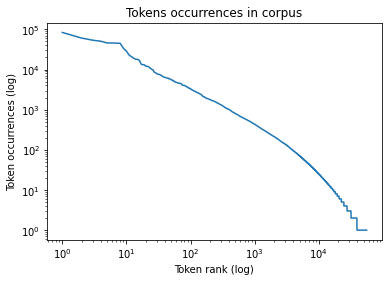

In [143]:
plt.plot(xs, ys)
plt.xlabel("Token rank (log)")
plt.ylabel("Token occurrences (log)")
plt.title("Tokens occurrences in corpus")
plt.xscale('log')
plt.yscale('log')
plt.show()

# Task 13.1
the distribution of words in the corpus

Log plot shows that the lower rank of word is, the lower it occurs - and this is something between linear or quadratic function so it means that tokens occurences number fails real quick (something about exponentially).

Words with the highest rank (highest occurrences rate) are usually short or/and domain specific (art, poz, ust) or short and not specific at all, they could be in any text very often (do, się, nr, dnia). Then there are words domain/language type specific (ustawy, brzmienie, postępowania. Then there are words that mean something specific, but are not domain specific and at the end there are rare words, which are highly specific for different domain than law, e.g. chemistry specific (trimetoksyamfetamina) or foreign language words.

# Task 7
Install Morfeusz (Binding dla Pythona) and use it to find all words that do not appear in that dictionary.

In [144]:
#!pip3 install morfeusz2

In [145]:
import morfeusz2
morfeusz = morfeusz2.Morfeusz()

In [146]:
morfeusz_no_words = set()

for bill in corpus.values():
    analysis = morfeusz.analyse(bill)
    tokens = {token.lower() for _, _, (token, _, part_of_speech, _, _) in analysis
              if part_of_speech == "ign" and token_valid(token)}
    
    morfeusz_no_words |= tokens

In [147]:
morfeusz_no_words

{'izobutylidenodimocznika',
 'npk',
 'nl',
 'wl',
 'molibde',
 'zastępcw',
 'zawart',
 'hydroizolacyjnych',
 'substancjinajmniej',
 'rehabi',
 'pdp',
 'tylidyna',
 'naro',
 'znacznikowa',
 'azotowegoamonu',
 'metoksyamfetamina',
 'doet',
 'pozorolniczych',
 'chemikali',
 'niektrych',
 'akrotiri',
 'urzęđu',
 'helgoland',
 'rasff',
 'barrégo',
 'cz',
 'cesie',
 'pochodzeniprzeliczeniu',
 'rozpuszcze',
 "wenerycznych'",
 'nymphaea',
 'późn',
 'cyjano',
 'typhimurium',
 'advogado',
 'tele',
 'pentabromofluoropropan',
 'biologica',
 'stwowych',
 'ovine',
 'morfolinomasłowy',
 'nętrznych',
 'antybiotykw',
 'klawisety',
 'rządzaniem',
 'izobutylidenodimoczni',
 'bowych',
 'zbywczą',
 'nym',
 'testw',
 'dofinan',
 'kontrollsystem',
 'v=0',
 'oczyszczal',
 'komdandytowo',
 'glinowoprzesiew',
 'dibromofluoropropan',
 'metoksy',
 'biliotekami',
 'ekologiskt',
 'niespełniają',
 'benzomorfan',
 'śródplonymi',
 'poczatkowego',
 'dzonych',
 'cowników',
 'zwierzęceg',
 'eures',
 'perfluoropochodne',


In [148]:
no_words = {}

for word, count in sorted_terms:
    if word in morfeusz_no_words:
        no_words[word] = count

In [149]:
no_words_sorted = sorted(no_words.items(), key=lambda k: (-k[1], k[0]))

# Task 8
Find 30 words with the highest ranks that do not belong to the dictionary.

In [150]:
top_30 = no_words_sorted[:30]

In [151]:
top_30

[('poz', 45224),
 ('późn', 1065),
 ('str', 516),
 ('gmo', 298),
 ('sww', 216),
 ('operacyjno', 209),
 ('skw', 196),
 ('rolno', 194),
 ('zm', 192),
 ('ex', 167),
 ('ike', 162),
 ('społeczno', 137),
 ('techniczno', 125),
 ('remediacji', 120),
 ('ure', 103),
 ('uke', 97),
 ('itp', 96),
 ('kn', 95),
 ('sanitarno', 88),
 ('np', 85),
 ('cn', 83),
 ('pkwiu', 81),
 ('udt', 77),
 ('bswsg', 70),
 ('bswp', 66),
 ('biobójczych', 63),
 ('organizacyjno', 58),
 ('phs', 53),
 ('wodociągowo', 47),
 ('hcfc', 44)]

Most of those words abbreviations (późn, poz) for word or name (GMO) or first part of word with dash (wodociągowo).

# Task 9
Find 30 random words (i.e. shuffle the words) with 5 occurrences that do not belong to the dictionary.

In [152]:
occur_5_words = [token for token in no_words_sorted if token[1] == 5]

In [153]:
import random
random.shuffle(occur_5_words)
occur_5_words_30 = occur_5_words[:30]

In [154]:
occur_5_words_30

[('mieszkalno', 5),
 ('cznika', 5),
 ('organicz', 5),
 ('wapnio', 5),
 ('schetyna', 5),
 ('difenylopropylo', 5),
 ('szcze', 5),
 ('winopochodne', 5),
 ('nym', 5),
 ('rialnego', 5),
 ('wlkp', 5),
 ('sposb', 5),
 ('vista', 5),
 ('contagious', 5),
 ('ym', 5),
 ('shigella', 5),
 ('zawart', 5),
 ('kj', 5),
 ('funkcjonalno', 5),
 ('informacyjno', 5),
 ('rci', 5),
 ('denitracyjne', 5),
 ('instrumen', 5),
 ('regazyfikacyjnego', 5),
 ('edukacyjno', 5),
 ('siarczano', 5),
 ('ppkt', 5),
 ('betezda', 5),
 ('metylofenetyloamina', 5),
 ('inspekcyjno', 5)]

There are some specialized words (metylofenetyloamina), English words (contagious, vista), abbreviations(wlkp for Wielkopolska)

# Task 13.2
the number of true misspellings vs. the number of unknown words,

Many of those words are not mispellings, they are just abbrevations of words or names or highly specialized words, which were not known to morfeusz. There are also parts of words with -, which has no meaning by themselves, but it was also my decision to not add those part1-part2 words to dictionary as it not always have sens (usually doesn't as this is joining two usable words). 

It is visible especially in those 5-times-occured words. Of course, there are many mispellings too, like:
'instumen' (instrument?), 'organicz' (organiczny?), 'waymienionej' (wymienionej?). There was also problem with white signs in the middle of the word which caused words like 'ący', which is just an ending.

# Task 10
Use Levenshtein distance and the frequency list, to determine the most probable correction of the words from lists defined in points 8 and 9.

I'm going to use BKTree with levenshtein distance built on frequency list. Then I'll choose from this list words with distance not bigger than given number.

(idea taken from here https://stackoverflow.com/questions/14228787/generating-a-list-of-distinct-distant-by-edit-distance-words-by-filtering)

In [34]:
# !pip3 install python-Levenshtein

In [35]:
# !pip3 install pybktree

In [36]:
import Levenshtein
import pybktree

bills_words = [word for word in freq_list.keys()]

tree = pybktree.BKTree(Levenshtein.distance, bills_words)

In the beggining I thought about max 1 lev. distance if word had length < 3 and 2 otherwise, but as I have to compare it with elasticsearch, I'll do it like I had fuziness set to AUTO , so 0 mistakes, when elem has length <= 2, 1 mistake with length 3-5 and 2 mistakes otherwise).
Then I order them by most recent occurence.

In [37]:
tree.find('ustowa', 2)

[(1, 'ustawa'),
 (2, 'ustawy'),
 (2, 'ustawą'),
 (2, 'ustala'),
 (2, 'ustawę'),
 (2, 'ustała'),
 (2, 'gotowa'),
 (2, 'ustaw'),
 (2, 'ostoja'),
 (2, 'żetowa'),
 (2, 'ustawia'),
 (2, 'stopa'),
 (2, 'istota'),
 (2, 'testowa'),
 (2, 'ustna'),
 (2, 'usuwa'),
 (2, 'słowa'),
 (2, 'umowa'),
 (2, 'ustka'),
 (2, 'stwa'),
 (2, 'hurtowa'),
 (2, 'ustawowa'),
 (2, 'usta')]

In [155]:
from time import time

In [156]:
def find_corrections(words):
    corr_dict = {}
    start = time()
    for word in words:
        found_corrections = {}
        dist = 0
        if len(word) >= 3:
            if len(word) < 6:
                dist = 1
            else:
                dist = 2
        found_words = tree.find(word, dist)
        found_corrections = {found: freq_list[found] for _, found in found_words}
        corr_dict[word] = sorted(found_corrections.items(), key= lambda x: -x[1])
    stop = time()
    print('Time elapsed:', stop - start)
    return corr_dict

In [82]:
def print_corrections(corrections):
    for correction in corrections:
        print('------', correction, '------')
        print(corrections[correction][:10])
        print()

Corrections of top 30 most popular non-words

In [157]:
top_30_corr = find_corrections([word[0] for word in top_30])

Time elapsed: 0.14306211471557617


In [84]:
print_corrections(top_30_corr)

------ poz ------
[('poz', 45224), ('po', 13546), ('pod', 1849), ('poza', 1164), ('roz', 4), ('pol', 4), ('pox', 3), ('prz', 2), ('pzz', 2), ('pos', 1)]

------ późn ------
[('późn', 1065), ('poźn', 2), ('pźn', 2), ('późń', 1)]

------ str ------
[('str', 516), ('sar', 44), ('st', 19), ('sdr', 8), ('stu', 7), ('sto', 6), ('sta', 1), ('stp', 1), ('ste', 1)]

------ gmo ------
[('go', 861), ('gmo', 298), ('mo', 14), ('amo', 4), ('imo', 4), ('gmp', 3), ('umo', 1), ('gm', 1)]

------ sww ------
[('sww', 216), ('skw', 196), ('swe', 24), ('ww', 17), ('swą', 15), ('sw', 5), ('sów', 1), ('şsww', 1)]

------ operacyjno ------
[('operacyjno', 209), ('operacyjnej', 163), ('operacyjne', 72), ('operacyjnego', 48), ('operacyjną', 34), ('operacyjna', 20), ('operacyjny', 18), ('operacyjnym', 9), ('operacyjni', 1)]

------ skw ------
[('sww', 216), ('skw', 196), ('kw', 28), ('sw', 5), ('sów', 1)]

------ rolno ------
[('rolno', 194), ('rolne', 161), ('wolno', 129), ('rolny', 22), ('rolną', 22), ('rolna

Corrections of 30 5-time occured words

In [158]:
occ_5_corr = find_corrections([word[0] for word in occur_5_words_30])

Time elapsed: 0.25011682510375977


In [86]:
print_corrections(occ_5_corr)

------ mieszkalno ------
[('mieszkalnego', 373), ('mieszkalne', 78), ('mieszkalny', 68), ('mieszkalnym', 50), ('mieszkalnej', 21), ('mieszkalno', 5), ('mieszkalną', 1), ('mieszkali', 1)]

------ tów ------
[('tzw', 6), ('ków', 6), ('tów', 5), ('ów', 2), ('rów', 2), ('zów', 1), ('sów', 1), ('nów', 1), ('bów', 1), ('łów', 1)]

------ instrumen ------
[('instrumenty', 36), ('instrumentu', 11), ('instrument', 8), ('instrumen', 5)]

------ vista ------
[('lista', 53), ('vista', 5), ('visna', 4)]

------ kpwig ------
[('kpwig', 5)]

------ ośc ------
[('oś', 6), ('ośc', 5), ('ości', 5), ('ość', 1), ('otc', 1)]

------ rci ------
[('ci', 53), ('ści', 8), ('rci', 5), ('rui', 1), ('ici', 1)]

------ ppkt ------
[('pkt', 19124), ('ppkt', 5), ('pakt', 1)]

------ difenylopropylo ------
[('difenylopropylo', 5)]

------ swine ------
[('swine', 5)]

------ contagious ------
[('contagious', 5)]

------ informacyjno ------
[('informacyjne', 68), ('informacyjnej', 27), ('informacyjnego', 26), ('informa

# Task 11
Load SGJP dictionary (Słownik SGJP dane tekstowe) to ElasticSearch (one document for each form) and use fuzzy matching to obtain the possible corrections of the 30 words with 5 occurrences that do not belong to the dictionary.

In [44]:
base_url = 'http://localhost:9200/'
headers = {'Content-Type': 'application/json'}

In [55]:
requests.delete(base_url + 'sgjp')

<Response [200]>

In [56]:
data = {
  'settings': {
    'index': {
      'analysis': {
        'analyzer': 'standard'
      }
    }
  },
    
  'mappings': {
    'properties': {
      'form': {
        'type': 'text'
      }
    }
  }
}

In [57]:
requests.put(base_url + 'sgjp', data=json.dumps(data), headers=headers)

<Response [200]>

In [58]:
sgjp_path = 'sgjp-20211107.tab'

In [66]:
with open(sgjp_path) as dictionary:
    data = []
    for line in dictionary:
        splitted = line.split()
        if len(splitted) == 4: # dict format
            data.append({'_index': 'sgjp', 'form': splitted[0].lower()}) # only word form will be needed, rest of information not
            break # only header has different format, if will make it slower so now I'll not use if
    
    for line in dictionary:
        splitted = line.split()
        data.append({'_index': 'sgjp', 'form': splitted[0].lower()})

In [67]:
#!pip3 install elasticsearch

     |████████████████████████████████| 378 kB 1.4 MB/s eta 0:00:01


In [68]:
from elasticsearch import Elasticsearch
from elasticsearch import helpers

es = Elasticsearch()

helpers.bulk(es, data)

(7409492, [])

In [99]:
query = {
    'query': {
        'fuzzy': {
            'form': {
                'value': 'ustowa' # fuziness set to AUTO as described before
            }
        }
    }
}

In [100]:
r = requests.get(base_url + 'sgjp/_search', json=query)

In [101]:
r.json()

{'took': 14,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 70, 'relation': 'eq'},
  'max_score': 14.322096,
  'hits': [{'_index': 'sgjp',
    '_type': '_doc',
    '_id': 'mk9FAX0BihDalM9-c3b3',
    '_score': 14.322096,
    '_source': {'form': 'ustowa'}},
   {'_index': 'sgjp',
    '_type': '_doc',
    '_id': 'm09FAX0BihDalM9-c3b3',
    '_score': 14.322096,
    '_source': {'form': 'ustowa'}},
   {'_index': 'sgjp',
    '_type': '_doc',
    '_id': '40lFAX0BihDalM9-HqML',
    '_score': 11.93508,
    '_source': {'form': 'mstowa'}},
   {'_index': 'sgjp',
    '_type': '_doc',
    '_id': '5ElFAX0BihDalM9-HqML',
    '_score': 11.93508,
    '_source': {'form': 'mstowa'}},
   {'_index': 'sgjp',
    '_type': '_doc',
    '_id': 'EUlFAX0BihDalM9-HqQL',
    '_score': 11.93508,
    '_source': {'form': 'mstowa'}},
   {'_index': 'sgjp',
    '_type': '_doc',
    '_id': 'K0tFAX0BihDalM9-OvEd',
    '_score': 11.93508,
    '_source': {

What's interesting, it fails on simple word 'ustowa' when I meant 'ustawa', maybe because lack of context.

In [159]:
corrects = {}
start = time()
for word in occur_5_words_30:
    query = {
    'query': {
        'fuzzy': {
            'form': {
                'value': word[0] # fuziness set to AUTO as described before
                }
            }
        }
    }
    
    r = requests.get(base_url + 'sgjp/_search', json=query)
    corrects[word[0]] = [word['_source']['form'] for word in r.json()['hits']['hits']]
stop = time()
print('Elapsed:', stop-start)
    

Elapsed: 0.329364538192749


In [115]:
corrects

{'mieszkalno': ['mieszkalno',
  'mieszkalni',
  'mieszkalni',
  'mieszkalni',
  'mieszkalnio',
  'mieszkalna',
  'mieszkalne',
  'mieszkalne',
  'mieszkalne',
  'mieszkalne'],
 'tów': ['lów',
  'otów',
  'rów',
  'sów',
  'sów',
  'tód',
  'atów',
  'mów',
  'mów',
  'nów'],
 'instrumen': ['instrument', 'instrumentu', 'instrumenty'],
 'vista': ['lista', 'wista', 'visa', 'kgb-ista'],
 'kpwig': [],
 'ośc': ['owc',
  'ośce',
  'ośce',
  'ośce',
  'ośca',
  'ośce',
  'oścu',
  'oścu',
  'ośm',
  'ośce'],
 'rci': ['irci',
  'irci',
  'irci',
  'pci',
  'rai',
  'rai',
  'rca',
  'rei',
  'rei',
  'rei'],
 'ppkt': ['pakt', 'pkt', 'pkt'],
 'difenylopropylo': [],
 'swine': ['swing', 'swing', 'swing', 'swing', 'sine', 'sine', 'sine', 'sine'],
 'contagious': [],
 'informacyjno': ['informacyjno',
  'informacyjna',
  'informacyjne',
  'informacyjne',
  'informacyjne',
  'informacyjne',
  'informacyjni',
  'informacyjny',
  'informacyjny',
  'informacyjną'],
 'kj': [],
 'zawart': ['gawart',
  'gawa

# Task 12
Compare the results of your algorithm and output of ES.

In [123]:
def print_corrections_comp(corrections_my, corrections_es):
    for correction in corrections_my:
        print('------', correction, '------')
        print('-- MINE --')
        print([correction[0] for correction in corrections_my[correction]])
        print('-- ES --')
        print(corrections_es[correction])
        print()

In [124]:
print_corrections_comp(occ_5_corr, corrects)

------ mieszkalno ------
-- MINE --
['mieszkalnego', 'mieszkalne', 'mieszkalny', 'mieszkalnym', 'mieszkalnej', 'mieszkalno', 'mieszkalną', 'mieszkali']
-- ES --
['mieszkalno', 'mieszkalni', 'mieszkalni', 'mieszkalni', 'mieszkalnio', 'mieszkalna', 'mieszkalne', 'mieszkalne', 'mieszkalne', 'mieszkalne']

------ tów ------
-- MINE --
['tzw', 'ków', 'tów', 'ów', 'rów', 'zów', 'sów', 'nów', 'bów', 'łów']
-- ES --
['lów', 'otów', 'rów', 'sów', 'sów', 'tód', 'atów', 'mów', 'mów', 'nów']

------ instrumen ------
-- MINE --
['instrumenty', 'instrumentu', 'instrument', 'instrumen']
-- ES --
['instrument', 'instrumentu', 'instrumenty']

------ vista ------
-- MINE --
['lista', 'vista', 'visna']
-- ES --
['lista', 'wista', 'visa', 'kgb-ista']

------ kpwig ------
-- MINE --
['kpwig']
-- ES --
[]

------ ośc ------
-- MINE --
['oś', 'ośc', 'ości', 'ość', 'otc']
-- ES --
['owc', 'ośce', 'ośce', 'ośce', 'ośca', 'ośce', 'oścu', 'oścu', 'ośm', 'ośce']

------ rci ------
-- MINE --
['ci', 'ści', 'rci', 

# Task 13.3
the performance of your method compared to ElasticSearch

In this scale, times are really similar (I didn't measure time od bktree creation or word indexing as when using it in real life, one would work on ready ES index or tree). But for just searching for corrections it is 
0.329364538192749 s for ES and 0.25011682510375977 for BKTree. This time my solution was faster but it also had smaller dictionary to search in and usually less words were found.

# Task 13.4 and 13.5
- the results provided by your method compared to ElasticSearch,
- the validity of the obtained corrections.


Count of results depended on the word as for some words my solution found more words and often they could really be corrections (but also, those 5-time-occured words weren't really mispellings) and sometimes ES found more of them so if I observed only numbers of corrections, it wouldn't be a winner but!

validity of obtained corrections were usually better in ElasticSearch, they were real words to begin with. My BKTree was fed with all words in bills so often it found terms that were not real words. But on plus for it was word 'ustowa' whith which my solution had no problem (I believe it was because of context - it was fed with law-words) and Elasticsearch didn't propose word 'ustawa', which seems to be easy one to find.